<a href="https://colab.research.google.com/github/sharmabinaya/AI-trajectory-of-a-magnetic-pendulum/blob/main/Trajectory_of_a_magnetic_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

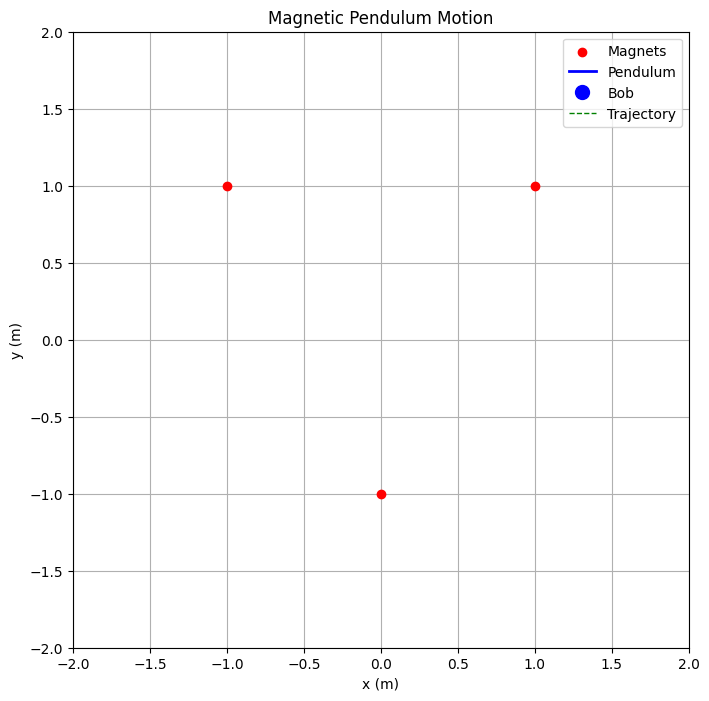

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
L = 1.0   # Length of the pendulum (m)
m = 1.0   # Mass of the pendulum bob (kg)
b = 0.1   # Damping coefficient (kg/s)
k = 1000  # Magnetic force constant (N·m^2/kg^2)

# Positions of fixed magnets (x, y)
magnets = np.array([[1, 1], [-1, 1], [0, -1]])

# Initial conditions: [theta, omega]
# theta = angle from vertical (radians), omega = angular velocity (rad/s)
initial_conditions = [np.pi / 4, 0]

# Time span for simulation (0 to 10 seconds)
t_span = (0, 10)
t_eval = np.linspace(0, 10, 500)

# Magnetic force function (Coulomb's law for magnetism)
def magnetic_force(x, y):
    force_x, force_y = 0, 0
    for magnet in magnets:
        dx = x - magnet[0]
        dy = y - magnet[1]
        distance_sq = dx**2 + dy**2
        if distance_sq < 0.01:  # Avoid division by zero
            distance_sq = 0.01
        force_magnitude = k / distance_sq
        force_x += -force_magnitude * dx / np.sqrt(distance_sq)
        force_y += -force_magnitude * dy / np.sqrt(distance_sq)
    return force_x, force_y

# Equations of motion
def equations_of_motion(t, state):
    theta, omega = state
    x = L * np.sin(theta)
    y = -L * np.cos(theta)

    # Forces
    gravity = -m * g * np.sin(theta) / L
    drag = -b * omega
    force_x, force_y = magnetic_force(x, y)
    magnetic = (force_x * np.cos(theta) + force_y * np.sin(theta)) / (m * L)

    # Derivatives
    dtheta_dt = omega
    domega_dt = gravity + magnetic + drag

    return [dtheta_dt, domega_dt]

# Solve the ODE
solution = solve_ivp(equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract results
theta = solution.y[0]
x = L * np.sin(theta)
y = -L * np.cos(theta)

# Create the animation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect("equal")
ax.grid()

# Plot the fixed magnets
ax.scatter(magnets[:, 0], magnets[:, 1], color="red", label="Magnets", zorder=5)

# Pendulum components
pendulum_line, = ax.plot([], [], "b-", lw=2, label="Pendulum")
pendulum_bob, = ax.plot([], [], "bo", markersize=10, label="Bob")
trajectory_line, = ax.plot([], [], "g--", lw=1, label="Trajectory")

# Initialize the animation
def init():
    pendulum_line.set_data([], [])
    pendulum_bob.set_data([], [])
    trajectory_line.set_data([], [])
    return pendulum_line, pendulum_bob, trajectory_line

# Update the animation frame by frame
def update(frame):
    # Pendulum position
    pendulum_x = [5, x[frame]]
    pendulum_y = [10, y[frame]]
    pendulum_line.set_data(pendulum_x, pendulum_y)
    pendulum_bob.set_data(x[frame], y[frame])

    # Trajectory up to the current frame
    trajectory_line.set_data(x[:frame], y[:frame])

    return pendulum_line, pendulum_bob, trajectory_line

# Create the animation
ani = animation.FuncAnimation(
    fig, update, frames=len(t_eval), init_func=init, blit=True, interval=20
)

# Add legend and labels
ax.legend()
ax.set_title("Magnetic Pendulum Motion")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

# Show the animation
plt.show()